# Programming Home Assignment: fMRI Data Visualisation - Social interaction

Gwendolyn Bossuyt
13.12.2024

Neurosynth link to the files used: https://neurosynth.org/analyses/terms/social%20interaction/

## Import standard packages 

I additionally added code to choose a topic name, so that all titles of figures can be easily generated depending on the topic.

In [149]:
import matplotlib.pyplot as plt
import os
import glob

# Choose topic
def set_topic(topic_name):
    return str(topic_name).title()
topic = set_topic("social interaction")
print(topic)

Social Interaction


## Locate MRI data automatically, based on file names

I did this by creating functions that search for the file by name, and rasie an error if no such file was found.

In [150]:
# Find the file path for the anatomical scan
def locate_file(file_name):
    """
    Locate a file in the current directory based on its name

    Args:
        file_name (str): Name of the file to locate.

    Returns:
        str: If the file is found, full file path.
        
    Raises:
        FileNotFoundError: If the file is not found.
    """

    search_path = os.path.join(os.getcwd(), file_name)              # join current directory with file name
    glob.glob(search_path)                                          # find file on the computer
    if glob.glob(search_path):                                      # if the file was found
        return glob.glob(search_path)[0]                            # return the first entry in the search results i.e. the file
    else:                                                           # if the file was not found
        raise FileNotFoundError(                                    # raise error stating the file was not found
            f"No file macthing '{file_name}' was found in the current working directory."
            )


an_file_path = locate_file("anatomical.nii.gz")                     # name the variable for future use
fun_file_path = locate_file("social interaction_uniformity-test_z_FDR_0.01.nii.gz") # name the variable for future use
print(f"Anatomical scan: {an_file_path}")                           # print the file path to ensure it is correct
print(f"Functional data: {fun_file_path}")                          # print the file path to ensure it is correct

Anatomical scan: /Users/gwendolynbossuyt/Downloads/Proramming Assignment/anatomical.nii.gz
Functional data: /Users/gwendolynbossuyt/Downloads/Proramming Assignment/social interaction_uniformity-test_z_FDR_0.01.nii.gz


## Visualise your functional data ontop of the anatomical scan 

I overlayed the functional data over the anatomical scan using the `plot_stat_map` function form `nilearn`.

I chose to add the title separately rather than with the title within the function, because I didn't like the white background it gave :)

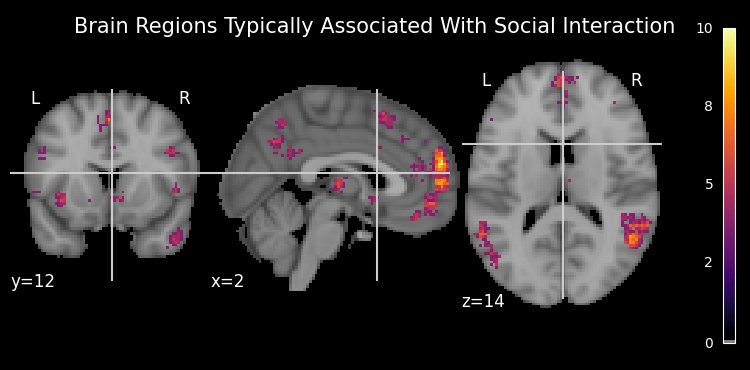

In [ ]:
from nilearn import plotting

# Visualise the data
plotting.plot_stat_map(
    fun_file_path,            # set statictical map image (the functional data)
    an_file_path,             # set background image (the anatomical scan)
    cmap = 'inferno',         # set color map
    vmin=0.1,                 # set minimum value as 0.1
    cut_coords=(2, 12, 14),   # set cut coordinates
    cbar_tick_format = "%i"   # set bar ticks to integers 
    )

plt.suptitle(
    f"Brain Regions Typically Associated With {topic}",    # set title
    color = "white",                             # set color (white so you can actually see it on the black background)
    fontsize = 15                                # set font size
    ) 
  
plotting.show()


## Plot a histogram of the values in the functional data file

I created the histogram using the `plt.hist()` function.

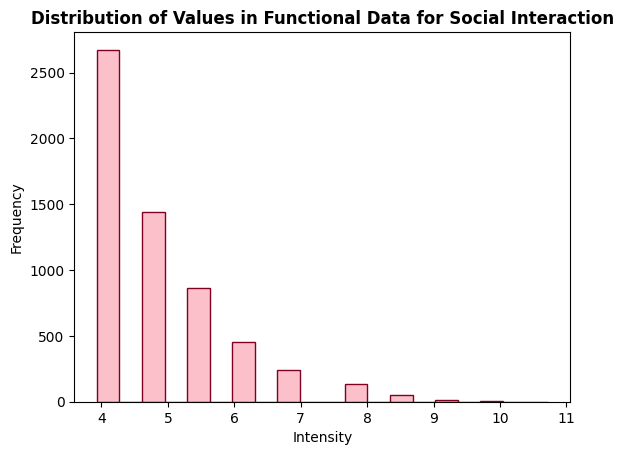

In [152]:
import nibabel as nib

# Extract data from file
functional_img = nib.load(fun_file_path)                # load data
functional_data = functional_img.get_fdata()            # extract data from image
positive_data = functional_data[functional_data > 0]    # extract only positive values

# Create histogram
plt.hist(                   # create histogram 
    positive_data,          # plot histogram values
    bins = 20,              # set number of bins
    color = '#FCC0CB',      # set color
    edgecolor = '#800020')  # set edge color
plt.title(
    f"Distribution of Values in Functional Data for {topic}", # set title     
    fontweight = 'bold')                                      # set title to bold
plt.xlabel("Intensity", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)

plt.show()